## Missing Appointment at the doctor predictor

Step 1: Clean the dataset`


In [153]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = './Missed_Appointment.csv'
raw_columns = ['Patient_ID', 'Appointment_ID', 
    'Patient_Gender', 'Appointment_ScheduledDate',
    'Appointment_Date', 'Patient_Age', 
    'Patient_Neighbourhood', 'Patient_Scholarship',
    'Patient_Hypertension', 'Patient_Diabetes',
    'Patient_Alcoholism', 'Patient_Handicap',
    'SMS_Received', 'No_Show']

raw_data = pd.read_csv(filename)
raw_data.columns = raw_columns
raw_data.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID                   110527 non-null float64
Appointment_ID               110527 non-null int64
Patient_Gender               110527 non-null object
Appointment_ScheduledDate    110527 non-null object
Appointment_Date             110527 non-null object
Patient_Age                  110527 non-null int64
Patient_Neighbourhood        110527 non-null object
Patient_Scholarship          110527 non-null int64
Patient_Hypertension         110527 non-null int64
Patient_Diabetes             110527 non-null int64
Patient_Alcoholism           110527 non-null int64
Patient_Handicap             110527 non-null int64
SMS_Received                 110527 non-null int64
No_Show                      110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Handeling Type
Based on this output, we can see that we do not have any missing data and that we have 5 columns of type object. We start by working on the time objects

In [4]:
def cleanTimeStamps(data):
    data[['Appointment_ScheduledDate']] = data.Appointment_ScheduledDate.apply(np.datetime64)
    data['Appointment_Scheduled_Year'] = data.Appointment_ScheduledDate.apply(lambda x: x.year)
    data['Appointment_Scheduled_Month'] = data.Appointment_ScheduledDate.apply(lambda x: x.month)
    data['Appointment_Scheduled_Day'] = data.Appointment_ScheduledDate.apply(lambda x: x.day)
    data['Appointment_Scheduled_Hour'] = data.Appointment_ScheduledDate.apply(lambda x: x.hour)
    data['Appointment_Scheduled_Minute'] = data.Appointment_ScheduledDate.apply(lambda x: x.minute)
    data['Appointment_Scheduled_Second'] = data.Appointment_ScheduledDate.apply(lambda x: x.second)

    
    data[['Appointment_Date']] = data.Appointment_Date.apply(np.datetime64)
    data['Appointment_Date_Year'] = data.Appointment_Date.apply(lambda x: x.year)
    data['Appointment_Date_Month'] = data.Appointment_Date.apply(lambda x: x.month)
    data['Appointment_Date_Day'] = data.Appointment_Date.apply(lambda x: x.day)
    
    print(data.info())
    
cleanTimeStamps(raw_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 23 columns):
Patient_ID                      110527 non-null float64
Appointment_ID                  110527 non-null int64
Patient_Gender                  110527 non-null object
Appointment_ScheduledDate       110527 non-null datetime64[ns]
Appointment_Date                110527 non-null datetime64[ns]
Patient_Age                     110527 non-null int64
Patient_Neighbourhood           110527 non-null object
Patient_Scholarship             110527 non-null int64
Patient_Hypertension            110527 non-null int64
Patient_Diabetes                110527 non-null int64
Patient_Alcoholism              110527 non-null int64
Patient_Handicap                110527 non-null int64
SMS_Received                    110527 non-null int64
No_Show                         110527 non-null object
Appointment_Scheduled_Year      110527 non-null int64
Appointment_Scheduled_Month     110527 non-null int64
Ap

### Rendering to numerical data
In this step, we will focus on transforming our data into numerical data. Convention used:
'No' -> 0 
'Yes' -> 1
'F' -> 0
'M' -> 1

In [5]:
## No Show target class
raw_data['No_Show'] = raw_data.No_Show.apply(lambda x: 1 if x=='Yes' else 0)


## Gender target class
raw_data['Patient_Gender'] = raw_data.Patient_Gender.apply(lambda x: 1 if x=='M' else 0)

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 23 columns):
Patient_ID                      110527 non-null float64
Appointment_ID                  110527 non-null int64
Patient_Gender                  110527 non-null int64
Appointment_ScheduledDate       110527 non-null datetime64[ns]
Appointment_Date                110527 non-null datetime64[ns]
Patient_Age                     110527 non-null int64
Patient_Neighbourhood           110527 non-null object
Patient_Scholarship             110527 non-null int64
Patient_Hypertension            110527 non-null int64
Patient_Diabetes                110527 non-null int64
Patient_Alcoholism              110527 non-null int64
Patient_Handicap                110527 non-null int64
SMS_Received                    110527 non-null int64
No_Show                         110527 non-null int64
Appointment_Scheduled_Year      110527 non-null int64
Appointment_Scheduled_Month     110527 non-null int64
Appo

### Cleaning data:
In this step, we will look at inconsistency in the data (e.g., outliers, min values, max values)

In [6]:
raw_data.describe()

,Patient_ID,Appointment_ID,Patient_Gender,Patient_Age,Patient_Scholarship,Patient_Hypertension,Patient_Diabetes,Patient_Alcoholism,Patient_Handicap,SMS_Received,No_Show,Appointment_Scheduled_Year,Appointment_Scheduled_Month,Appointment_Scheduled_Day,Appointment_Scheduled_Hour,Appointment_Scheduled_Minute,Appointment_Scheduled_Second,Appointment_Date_Year,Appointment_Date_Month,Appointment_Date_Day
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.0,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,2015.999439,4.823871,14.252228,10.774517,28.997955,29.529445,2016.0,5.210048,12.499398
std,2.560949e+14,7.129575e+04,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,0.023678,0.715801,9.345629,3.216189,17.253733,17.274916,0.0,0.473780,9.056482
min,3.921784e+04,5.030230e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,6.000000,0.000000,0.000000,2016.0,4.000000,1.000000
25%,4.172614e+12,5.640286e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,4.000000,6.000000,8.000000,14.000000,15.000000,2016.0,5.000000,5.000000
50%,3.173184e+13,5.680573e+06,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,13.000000,10.000000,29.000000,30.000000,2016.0,5.000000,10.000000
75%,9.439172e+13,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,5.000000,22.000000,13.000000,44.000000,44.000000,2016.0,5.000000,19.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2016.000000,12.000000,31.000000,21.000000,59.000000,59.000000,2016.0,6.000000,31.000000


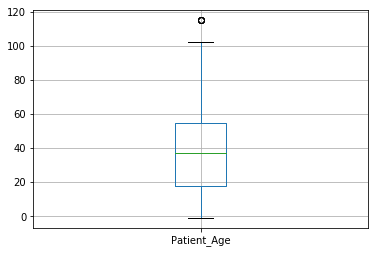

In [7]:
raw_data[['Patient_Age']].boxplot()
plt.show()

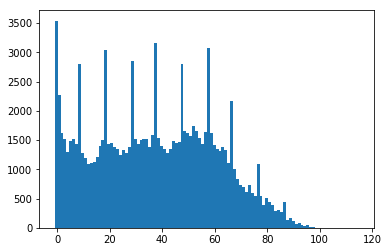

In [34]:
plt.hist(raw_data.Patient_Age, bins= len(raw_data.Patient_Age.unique()))
plt.show()

In [48]:
raw_data = raw_data.drop(raw_data.index[raw_data.Patient_Age < 0])
raw_data = raw_data.drop(raw_data.index[raw_data.Patient_Age > 100])
raw_data.Patient_Age.describe()

count    110519.000000
mean         37.084519
std          23.103165
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: Patient_Age, dtype: float64

In [112]:
raw_data.to_csv('Cleanned_MA.csv', encoding='utf-8', index= False)


### Feature engineering
Here we will focus on creating new features. Let us start by loading our cleaned data

In [163]:
data = pd.read_csv('Cleanned_MA.csv', encoding= 'utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110519 entries, 0 to 110518
Data columns (total 23 columns):
Patient_ID                      110519 non-null float64
Appointment_ID                  110519 non-null int64
Patient_Gender                  110519 non-null int64
Appointment_ScheduledDate       110519 non-null object
Appointment_Date                110519 non-null object
Patient_Age                     110519 non-null int64
Patient_Neighbourhood           110519 non-null object
Patient_Scholarship             110519 non-null int64
Patient_Hypertension            110519 non-null int64
Patient_Diabetes                110519 non-null int64
Patient_Alcoholism              110519 non-null int64
Patient_Handicap                110519 non-null int64
SMS_Received                    110519 non-null int64
No_Show                         110519 non-null int64
Appointment_Scheduled_Year      110519 non-null int64
Appointment_Scheduled_Month     110519 non-null int64
Appointment_Schedule

we will first start by building the elapsed time feature as the number of days between booking an appointment and the actual appointment. Low elapsed time can indicate an urgency from the patient while high elapsed time can indicate a routine check up

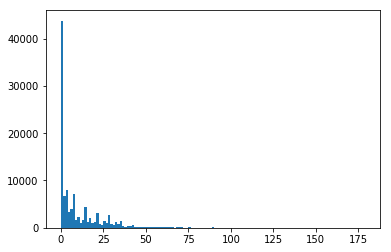

In [164]:
data['Appointment_ScheduledDate'] = pd.to_datetime(data['Appointment_ScheduledDate'])
data['Appointment_Date'] = pd.to_datetime(data['Appointment_Date'])
data['Appointment_ElapsedTime'] = data['Appointment_ScheduledDate'] - data['Appointment_Date']
data['Appointment_ElapsedTime'] = data['Appointment_ElapsedTime'].apply(lambda x: abs(x.days))

plt.hist(data.Appointment_ElapsedTime, bins= len(data.Appointment_ElapsedTime.unique()))
plt.show()


In [165]:
data['Appointment_DayOfWeek'] = data['Appointment_Date'].dt.dayofweek
days = pd.get_dummies(data['Appointment_DayOfWeek'])

days_of_week_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
days.columns= days_of_week_names
data = data.join(days)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110519 entries, 0 to 110518
Data columns (total 31 columns):
Patient_ID                      110519 non-null float64
Appointment_ID                  110519 non-null int64
Patient_Gender                  110519 non-null int64
Appointment_ScheduledDate       110519 non-null datetime64[ns]
Appointment_Date                110519 non-null datetime64[ns]
Patient_Age                     110519 non-null int64
Patient_Neighbourhood           110519 non-null object
Patient_Scholarship             110519 non-null int64
Patient_Hypertension            110519 non-null int64
Patient_Diabetes                110519 non-null int64
Patient_Alcoholism              110519 non-null int64
Patient_Handicap                110519 non-null int64
SMS_Received                    110519 non-null int64
No_Show                         110519 non-null int64
Appointment_Scheduled_Year      110519 non-null int64
Appointment_Scheduled_Month     110519 non-null int64
Appo

### Statistical analysis
Conduct a statistical analysis on the features with a deep dive on engineered features, Age, day of the week, month, SMS received, scholarship and diseases

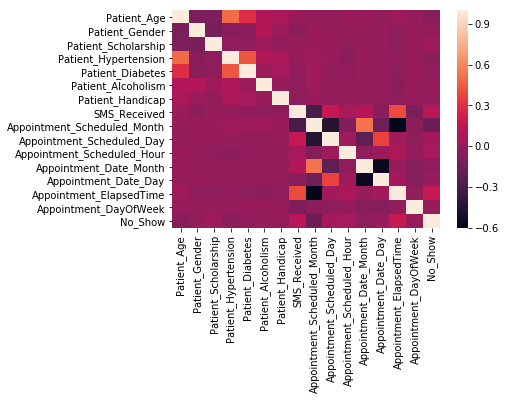

In [166]:
def corrolationMap(data, columns):
    temp = data[columns]
    sns.heatmap(temp.corr())
    plt.show()


predictors = ['Patient_Age', 'Patient_Gender', 'Patient_Scholarship', 'Patient_Hypertension', 'Patient_Diabetes', 
              'Patient_Alcoholism', 'Patient_Handicap', 'SMS_Received','Appointment_Scheduled_Month', 
              'Appointment_Scheduled_Day', 'Appointment_Scheduled_Hour', 'Appointment_Date_Month', 'Appointment_Date_Day', 
              'Appointment_ElapsedTime', 'Appointment_DayOfWeek', 'No_Show']
corrolationMap(data, predictors)

In [ ]:
def statisticalAnalysis(data, column_to_analyze, target):
    print('to implement')

### Factor analysis
Conduct a factor analysis to determine which predictors, or pair of predictors are the most important

In [ ]:
def factorAnalysis(data, columns, target, factor):
    print('To implement')